<a href="https://colab.research.google.com/github/isabelly-remigio/analise_exploratoria/blob/main/snct_dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ETAPA 1: ENTENDER OS DADOS


**CARREGAMENDO DO DATASET**

In [1]:
# Instalar o ydata-profiling (gera relatorios automaticos)
!pip install ydata-profiling

# Biblioteca para análise de dados
import pandas as pd

# Biblioteca para cálculos matemáticos
import numpy as np

# Biblioteca para gráficos
import matplotlib.pyplot as plt

# Biblioteca para gráficos bonitos
import seaborn as sns

# Biblioteca para datas
from datetime import datetime

print("✅ Bibliotecas carregadas!")
print("✅ ydata-profiling instalado e importado!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
✅ Bibliotecas carregadas!
✅ ydata-profiling instalado e importado!


In [2]:
import pandas as pd

# URL do dataset público de exemplo (água e saúde)
url = "https://raw.githubusercontent.com/isabelly-remigio/analise_exploratoria/main/water_pollution_disease.csv"
df = pd.read_csv(url)

print(f"📊 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")

📊 Dimensões: 3000 linhas x 24 colunas


### Relatorio automatico usando ydata

In [4]:
from ydata_profiling import ProfileReport

print("📊 GERANDO RELATÓRIO AUTOMÁTICO COMPLETO...")
print("⏳ Isso pode levar alguns minutos...")

# Configurar e gerar relatório completo
profile = ProfileReport(
    df,
    title="RELATÓRIO COMPLETO - Poluição da Água e Doenças",
    dataset={
        "description": "Análise exploratória completa da relação entre qualidade da água e indicadores de saúde pública",
        "creator": "Oficina EDA - Análise de Dados",
        "copyright_holder": "Isabelly Remigio"
    },
    variables={
        "descriptions": {
            "Pais": "País onde os dados foram coletados",
            "Regiao": "Região geográfica",
            "Ano": "Ano da coleta de dados",
            "Concentracao_Chumbo_ugL": "Concentração de chumbo na água (microgramas por litro)",
            "Contagem_Bacterias_CFUmL": "Contagem de bactérias na água",
            "Casos_Diarreia_100mil": "Casos de diarreia por 100.000 habitantes",
            "Acesso_Agua_Limpa_Percentual": "Percentual da população com acesso à água limpa",
            "Cobertura_Saneamento_Percentual": "Cobertura de serviços de saneamento básico"
        }
    },
    explorative=True,
    minimal=False,
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "kendall": {"calculate": True}
    },
    interactions={
        "continuous": True
    },
    missing_diagrams={
        "bar": True,
        "matrix": True,
        "heatmap": True
    }
)

# Salvar relatório completo
profile.to_file("RELATORIO_COMPLETO_POLUICAO_AGUA.html")

print("🎉 RELATÓRIO COMPLETO GERADO COM SUCESSO!")
print("📁 Salvo como: RELATORIO_COMPLETO_POLUICAO_AGUA.html")
print("💡 Você pode fazer download pelo menu de arquivos do Colab")

📊 GERANDO RELATÓRIO AUTOMÁTICO COMPLETO...
⏳ Isso pode levar alguns minutos...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:00<00:00, 44.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

🎉 RELATÓRIO COMPLETO GERADO COM SUCESSO!
📁 Salvo como: RELATORIO_COMPLETO_POLUICAO_AGUA.html
💡 Você pode fazer download pelo menu de arquivos do Colab


### **PRIMEIRA VISUALIZAÇÃO**

In [3]:
df.head() # ler as primeiras 5 linhas

Country   Region  Year Water Source Type  Contaminant Level (ppm)  \
0     Mexico    North  2015              Lake                     6.06   
1     Brazil     West  2017              Well                     5.24   
2  Indonesia  Central  2022              Pond                     0.24   
3    Nigeria     East  2016              Well                     7.91   
4     Mexico    South  2005              Well                     0.12   

   pH Level  Turbidity (NTU)  Dissolved Oxygen (mg/L)  Nitrate Level (mg/L)  \
0      7.12             3.93                     4.28                  8.28   
1      7.84             4.79                     3.86                 15.74   
2      6.43             0.79                     3.42                 36.67   
3      6.71             1.96                     3.12                 36.92   
4      8.16             4.22                     9.15                 49.35   

   Lead Concentration (µg/L)  ...  Cholera Cases per 100,000 people  \
0                       7.89  ...                                33   
1                      14.68  ...                                27   
2                       9.96  ...                                39   
3                       6.77  ...                                33   
4                      12.51  ...                                31   

  Typhoid Cases per 100,000 people  \
0                               44   
1                                8   
2                               50   
3                               13   
4                               68   

   Infant Mortality Rate (per 1,000 live births)  GDP per Capita (USD)  \
0                                          76.16                 57057   
1                                          77.30                 17220   
2                                          48.45                 86022   
3                                          95.66                 31166   
4                                          58.78                 25661   

   Healthcare Access Index (0-100)  Urbanization Rate (%)  \
0                            96.92                  84.61   
1                            84.73                  73.37   
2                            58.37                  72.86   
3                            39.07                  71.07   
4                            23.03                  55.55   

   Sanitation Coverage (% of Population)  Rainfall (mm per year)  \
0                                  63.23                    2800   
1                                  29.12                    1572   
2                                  93.56                    2074   
3                                  94.25                     937   
4                                  69.23                    2295   

   Temperature (°C)  Population Density (people per km²)  
0              4.94                                  593  
1             16.93                                  234  
2             21.73                                   57  
3              3.79                                  555  
4             31.44                                  414  

[5 rows x 24 columns]

In [4]:
df.info() # mostra informações gerais da base (qtde de linhas, colunas, tipos de dados etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [5]:
df.shape # mostra numero de linhas e colunas


(3000, 24)

In [6]:
df.columns # mostra nome das colunas

Index(['Country', 'Region', 'Year', 'Water Source Type',
       'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
       'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
       'Water Treatment Method', 'Access to Clean Water (% of Population)',
       'Diarrheal Cases per 100,000 people',
       'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
       'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
       'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
       'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
       'Temperature (°C)', 'Population Density (people per km²)'],
      dtype='object')

In [7]:
linhas, colunas = df.shape[0], df.shape[1]

print("Linhas: ", linhas)
print("Colunas: ", colunas)

Linhas:  3000
Colunas:  24


In [8]:
# Ver tipos de dados de cada coluna
df.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)                               int64
Healthcare Access Index (0-100)                  float64
Urbanization Rate (%)                            float64
Sanitation Coverage (% of Population)            float64
Rainfall (mm per year)                             int64
Temperature (°C)                                 float64
Population Density (people per km²)                int64
dtype: object

## ETAPA 2: LIMPAR OS DADOS


In [9]:
# Contar valores vazios em cada coluna
valores_faltantes = df.isnull().sum()

print("Valores faltantes por coluna:")
print(valores_faltantes[valores_faltantes > 0])

Valores faltantes por coluna:
Water Treatment Method    747
dtype: int64


In [10]:
print("\n🔧 APLICANDO TRATAMENTO AOS DADOS FALTANTES:")
print("=" * 50)

# Usando SUA variável existente: valores_faltantes
dados_com_faltantes = valores_faltantes[valores_faltantes > 0]

if len(dados_com_faltantes) > 0:
    print("📋 TRATANDO VARIÁVEIS COM DADOS FALTANTES:")

    for coluna in dados_com_faltantes.index:  # ✅ Agora usando SUA variável
        quantidade_faltantes = valores_faltantes[coluna]
        percentual = (quantidade_faltantes / len(df)) * 100

        print(f"\n📝 {coluna}:")
        print(f"   • {quantidade_faltantes} valores faltantes ({percentual:.1f}%)")
        print(f"   • Tipo: {df[coluna].dtype}")

        # Variáveis CATEGÓRICAS
        if df[coluna].dtype == 'object':
            df[coluna] = df[coluna].fillna('Não Informado')
            print(f"   ✅ Preenchido com 'Não Informado'")

        # Variáveis NUMÉRICAS
        elif df[coluna].dtype in ['int64', 'float64']:
            if percentual < 10:
                valor_preenchimento = df[coluna].median()
                df[coluna] = df[coluna].fillna(valor_preenchimento)
                print(f"   ✅ Preenchido com mediana: {valor_preenchimento:.2f}")
            else:
                df[coluna] = df[coluna].fillna(-1)
                print(f"   ✅ Preenchido com -1 (marcador)")

        else:
            df[coluna] = df[coluna].fillna('Faltante')
            print(f"   ✅ Preenchido com 'Faltante'")

    print("\n🎉 TRATAMENTO CONCLUÍDO!")
else:
    print("✅ Nenhum dado faltante para tratar!")


🔧 APLICANDO TRATAMENTO AOS DADOS FALTANTES:
📋 TRATANDO VARIÁVEIS COM DADOS FALTANTES:

📝 Water Treatment Method:
   • 747 valores faltantes (24.9%)
   • Tipo: object
   ✅ Preenchido com 'Não Informado'

🎉 TRATAMENTO CONCLUÍDO!


In [11]:
print("\n📋 VERIFICANDO RESULTADO DO TRATAMENTO:")
print("=" * 45)

# Verificar se ainda existem dados faltantes
valores_faltantes_pos = df.isnull().sum()
valores_faltantes_pos = valores_faltantes_pos[valores_faltantes_pos > 0]

if len(valores_faltantes_pos) == 0:
    print("✅ SUCESSO! Todos os dados faltantes foram tratados!")
    print(f"📊 Dataset limpo: {len(df)} registros completos")
else:
    print(f"⚠️  Ainda existem dados faltantes:")
    for coluna, quantidade in valores_faltantes_pos.items():
        print(f"   • {coluna}: {quantidade} valores")


📋 VERIFICANDO RESULTADO DO TRATAMENTO:
✅ SUCESSO! Todos os dados faltantes foram tratados!
📊 Dataset limpo: 3000 registros completos


In [12]:
# Contar linhas duplicadas
duplicatas = df.duplicated().sum()

print(f"Linhas duplicadas: {duplicatas}")

Linhas duplicadas: 0


In [13]:
df.columns # mostra nome das colunas

Index(['Country', 'Region', 'Year', 'Water Source Type',
       'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
       'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
       'Water Treatment Method', 'Access to Clean Water (% of Population)',
       'Diarrheal Cases per 100,000 people',
       'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
       'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
       'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
       'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
       'Temperature (°C)', 'Population Density (people per km²)'],
      dtype='object')

In [14]:
# Dicionário de tradução
traducao_colunas = {
    'Country': 'Pais',
    'Region': 'Regiao',
    'Year': 'Ano',
    'Water Source Type': 'Tipo_Fonte_Agua',
    'Contaminant Level (ppm)': 'Nivel_Contaminante_ppm',
    'pH Level': 'Nivel_pH',
    'Turbidity (NTU)': 'Turbidez_NTU',
    'Dissolved Oxygen (mg/L)': 'Oxigenio_Dissolvido_mgL',
    'Nitrate Level (mg/L)': 'Nivel_Nitrato_mgL',
    'Lead Concentration (µg/L)': 'Concentracao_Chumbo_ugL',
    'Bacteria Count (CFU/mL)': 'Contagem_Bacterias_CFUmL',
    'Water Treatment Method': 'Metodo_Tratamento_Agua',
    'Access to Clean Water (% of Population)': 'Acesso_Agua_Limpa_Percentual',
    'Diarrheal Cases per 100,000 people': 'Casos_Diarreia_100mil',
    'Cholera Cases per 100,000 people': 'Casos_Colera_100mil',
    'Typhoid Cases per 100,000 people': 'Casos_Tifoide_100mil',
    'Infant Mortality Rate (per 1,000 live births)': 'Taxa_Mortalidade_Infantil',
    'GDP per Capita (USD)': 'PIB_Per_Capita_USD',
    'Healthcare Access Index (0-100)': 'Indice_Acesso_Saude',
    'Urbanization Rate (%)': 'Taxa_Urbanizacao_Percentual',
    'Sanitation Coverage (% of Population)': 'Cobertura_Saneamento_Percentual',
    'Rainfall (mm per year)': 'Precipitacao_mm_ano',
    'Temperature (°C)': 'Temperatura_C',
    'Population Density (people per km²)': 'Densidade_Populacional_km2'
}



In [15]:
# Aplicar tradução
df = df.rename(columns=traducao_colunas)

for i, coluna in enumerate(df.columns, 1):
    print(f"{i:2d}. {coluna}")



 1. Pais
 2. Regiao
 3. Ano
 4. Tipo_Fonte_Agua
 5. Nivel_Contaminante_ppm
 6. Nivel_pH
 7. Turbidez_NTU
 8. Oxigenio_Dissolvido_mgL
 9. Nivel_Nitrato_mgL
10. Concentracao_Chumbo_ugL
11. Contagem_Bacterias_CFUmL
12. Metodo_Tratamento_Agua
13. Acesso_Agua_Limpa_Percentual
14. Casos_Diarreia_100mil
15. Casos_Colera_100mil
16. Casos_Tifoide_100mil
17. Taxa_Mortalidade_Infantil
18. PIB_Per_Capita_USD
19. Indice_Acesso_Saude
20. Taxa_Urbanizacao_Percentual
21. Cobertura_Saneamento_Percentual
22. Precipitacao_mm_ano
23. Temperatura_C
24. Densidade_Populacional_km2


In [16]:
df.head(2) ##agora traduzido

Pais Regiao   Ano Tipo_Fonte_Agua  Nivel_Contaminante_ppm  Nivel_pH  \
0  Mexico  North  2015            Lake                    6.06      7.12   
1  Brazil   West  2017            Well                    5.24      7.84   

   Turbidez_NTU  Oxigenio_Dissolvido_mgL  Nivel_Nitrato_mgL  \
0          3.93                     4.28               8.28   
1          4.79                     3.86              15.74   

   Concentracao_Chumbo_ugL  ...  Casos_Colera_100mil Casos_Tifoide_100mil  \
0                     7.89  ...                   33                   44   
1                    14.68  ...                   27                    8   

   Taxa_Mortalidade_Infantil  PIB_Per_Capita_USD  Indice_Acesso_Saude  \
0                      76.16               57057                96.92   
1                      77.30               17220                84.73   

   Taxa_Urbanizacao_Percentual  Cobertura_Saneamento_Percentual  \
0                        84.61                            63.23   
1                        73.37                            29.12   

   Precipitacao_mm_ano  Temperatura_C  Densidade_Populacional_km2  
0                 2800           4.94                         593  
1                 1572          16.93                         234  

[2 rows x 24 columns]

## ETAPA 3: DESCREVER OS DADOS


In [29]:

print("📈 ESTATÍSTICAS GERAIS DO DATASET:")
print(f"• Total de registros: {len(df):,}")
print(f"• Total de variáveis: {len(df.columns)}")
print(f"• Período: {df['Ano'].min()} a {df['Ano'].max()}")



📈 ESTATÍSTICAS GERAIS DO DATASET:
• Total de registros: 3,000
• Total de variáveis: 24
• Período: 2000 a 2024


In [17]:
df.describe() # mostra as estatiticas dos dados descritivos (numeros)

Ano  Nivel_Contaminante_ppm     Nivel_pH  Turbidez_NTU  \
count  3000.000000             3000.000000  3000.000000   3000.000000   
mean   2012.012667                4.954390     7.255847      2.480023   
std       7.229287                2.860072     0.720464      1.419984   
min    2000.000000                0.000000     6.000000      0.000000   
25%    2006.000000                2.560000     6.630000      1.257500   
50%    2012.000000                4.950000     7.280000      2.460000   
75%    2018.000000                7.400000     7.870000      3.660000   
max    2024.000000               10.000000     8.500000      4.990000   

       Oxigenio_Dissolvido_mgL  Nivel_Nitrato_mgL  Concentracao_Chumbo_ugL  \
count              3000.000000         3000.00000              3000.000000   
mean                  6.492850           25.08025                10.047913   
std                   2.027966           14.50517                 5.798238   
min                   3.000000            0.05000                 0.000000   
25%                   4.710000           12.52500                 5.120000   
50%                   6.490000           24.79000                10.065000   
75%                   8.252500           37.91000                15.032500   
max                  10.000000           49.99000                20.000000   

       Contagem_Bacterias_CFUmL  Acesso_Agua_Limpa_Percentual  \
count               3000.000000                   3000.000000   
mean                2488.477333                     64.612333   
std                 1431.421553                     20.308463   
min                    0.000000                     30.010000   
25%                 1268.000000                     47.027500   
50%                 2469.000000                     64.780000   
75%                 3736.250000                     82.302500   
max                 4998.000000                     99.990000   

       Casos_Diarreia_100mil  Casos_Colera_100mil  Casos_Tifoide_100mil  \
count            3000.000000           3000.00000           3000.000000   
mean              249.776667             24.25100             49.270000   
std               144.111543             14.33259             28.984165   
min                 0.000000              0.00000              0.000000   
25%               124.000000             12.00000             24.000000   
50%               248.000000             24.00000             49.000000   
75%               378.000000             37.00000             75.000000   
max               499.000000             49.00000             99.000000   

       Taxa_Mortalidade_Infantil  PIB_Per_Capita_USD  Indice_Acesso_Saude  \
count                3000.000000         3000.000000          3000.000000   
mean                   50.811900        50036.196667            50.029193   
std                    28.465323        28598.750508            28.896676   
min                     2.060000          521.000000             0.190000   
25%                    26.467500        25010.250000            24.982500   
50%                    50.230000        49621.500000            50.390000   
75%                    76.260000        74778.250000            74.817500   
max                    99.990000        99948.000000            99.980000   

       Taxa_Urbanizacao_Percentual  Cobertura_Saneamento_Percentual  \
count                  3000.000000                      3000.000000   
mean                     50.062480                        60.371007   
std                      22.779125                        23.159678   
min                      10.030000                        20.010000   
25%                      30.557500                        40.440000   
50%                      49.795000                        60.580000   
75%                      69.727500                        80.420000   
max                      89.980000                        99.990000   

       Precipitacao_mm_ano  Temperatura_C  Densidade_Popul

In [30]:
print("VARIÁVEIS")

# Contar tipos de dados
tipos_dados = df.dtypes.value_counts()
print("Tipos de dados no dataset:")
for tipo, quantidade in tipos_dados.items():
    print(f"• {tipo}: {quantidade} variáveis")

# Variáveis numéricas
variaveis_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n🔢 VARIÁVEIS NUMÉRICAS ({len(variaveis_numericas)}):")
for i, var in enumerate(variaveis_numericas[:5], 1):  # Mostra só as 10 primeiras
    print(f"  {i}. {var}")

# Variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 VARIÁVEIS CATEGÓRICAS ({len(variaveis_categoricas)}):")
for i, var in enumerate(variaveis_categoricas, 1):
    print(f"  {i}. {var}")

VARIÁVEIS
Tipos de dados no dataset:
• float64: 12 variáveis
• int64: 8 variáveis
• object: 4 variáveis

🔢 VARIÁVEIS NUMÉRICAS (20):
  1. Ano
  2. Nivel_Contaminante_ppm
  3. Nivel_pH
  4. Turbidez_NTU
  5. Oxigenio_Dissolvido_mgL

📝 VARIÁVEIS CATEGÓRICAS (4):
  1. Pais
  2. Regiao
  3. Tipo_Fonte_Agua
  4. Metodo_Tratamento_Agua


In [20]:
print("🎯 ESTATÍSTICAS DAS VARIÁVEIS PRINCIPAIS:")
print("=" * 45)

# Função para analisar uma variável específica
def analisar_variavel(nome_variavel):
    if nome_variavel in df.columns:
        print(f"\n📊 {nome_variavel}:")
        print(f"   Média: {df[nome_variavel].mean():.2f}")
        print(f"   Mediana: {df[nome_variavel].median():.2f}")
        print(f"   Desvio Padrão: {df[nome_variavel].std():.2f}")
        print(f"   Mínimo: {df[nome_variavel].min():.2f}")
        print(f"   Máximo: {df[nome_variavel].max():.2f}")
        print(f"   Valores faltantes: {df[nome_variavel].isnull().sum()}")

# Analisar variáveis de poluição
print("🔬 POLUIÇÃO:")
if 'Concentracao_Chumbo_ugL' in df.columns:
    analisar_variavel('Concentracao_Chumbo_ugL')
if 'Contagem_Bacterias_CFUmL' in df.columns:
    analisar_variavel('Contagem_Bacterias_CFUmL')

print("\n🏥 SAÚDE:")
if 'Casos_Diarreia_100mil' in df.columns:
    analisar_variavel('Casos_Diarreia_100mil')
if 'Taxa_Mortalidade_Infantil' in df.columns:
    analisar_variavel('Taxa_Mortalidade_Infantil')

print("\n💧 ACESSO:")
if 'Acesso_Agua_Limpa_Percentual' in df.columns:
    analisar_variavel('Acesso_Agua_Limpa_Percentual')
if 'Cobertura_Saneamento_Percentual' in df.columns:
    analisar_variavel('Cobertura_Saneamento_Percentual')

🎯 ESTATÍSTICAS DAS VARIÁVEIS PRINCIPAIS:
🔬 POLUIÇÃO:

📊 Concentracao_Chumbo_ugL:
   Média: 10.05
   Mediana: 10.07
   Desvio Padrão: 5.80
   Mínimo: 0.00
   Máximo: 20.00
   Valores faltantes: 0

📊 Contagem_Bacterias_CFUmL:
   Média: 2488.48
   Mediana: 2469.00
   Desvio Padrão: 1431.42
   Mínimo: 0.00
   Máximo: 4998.00
   Valores faltantes: 0

🏥 SAÚDE:

📊 Casos_Diarreia_100mil:
   Média: 249.78
   Mediana: 248.00
   Desvio Padrão: 144.11
   Mínimo: 0.00
   Máximo: 499.00
   Valores faltantes: 0

📊 Taxa_Mortalidade_Infantil:
   Média: 50.81
   Mediana: 50.23
   Desvio Padrão: 28.47
   Mínimo: 2.06
   Máximo: 99.99
   Valores faltantes: 0

💧 ACESSO:

📊 Acesso_Agua_Limpa_Percentual:
   Média: 64.61
   Mediana: 64.78
   Desvio Padrão: 20.31
   Mínimo: 30.01
   Máximo: 99.99
   Valores faltantes: 0

📊 Cobertura_Saneamento_Percentual:
   Média: 60.37
   Mediana: 60.58
   Desvio Padrão: 23.16
   Mínimo: 20.01
   Máximo: 99.99
   Valores faltantes: 0


In [22]:
print("📝 ANÁLISE DE VARIÁVEIS CATEGÓRICAS:")
print("=" * 45)

# Análise de países
print("🌍 PAÍSES:")
print(f"• Total de países: {df['Pais'].nunique()}")
print(f"• País com mais registros: {df['Pais'].value_counts().index[0]}")
print(f"• País com menos registros: {df['Pais'].value_counts().index[-1]}")

# Análise de regiões
print("\n🗺️ REGIÕES:")
print(f"• Total de regiões: {df['Regiao'].nunique()}")
print("• Distribuição por região:")
for regiao, count in df['Regiao'].value_counts().items():
    percentual = (count / len(df)) * 100
    print(f"  - {regiao}: {count} registros ({percentual:.1f}%)")

# Análise de anos
print(f"\n📅 ANOS:")
print(f"• Período: {df['Ano'].min()} a {df['Ano'].max()}")
print("• Distribuição por ano:")
for ano, count in df['Ano'].value_counts().sort_index().items():
    print(f"  - {ano}: {count} registros")

📝 ANÁLISE DE VARIÁVEIS CATEGÓRICAS:
🌍 PAÍSES:
• Total de países: 10
• País com mais registros: USA
• País com menos registros: Mexico

🗺️ REGIÕES:
• Total de regiões: 5
• Distribuição por região:
  - East: 625 registros (20.8%)
  - Central: 611 registros (20.4%)
  - West: 594 registros (19.8%)
  - North: 590 registros (19.7%)
  - South: 580 registros (19.3%)

📅 ANOS:
• Período: 2000 a 2024
• Distribuição por ano:
  - 2000: 115 registros
  - 2001: 131 registros
  - 2002: 114 registros
  - 2003: 111 registros
  - 2004: 125 registros
  - 2005: 122 registros
  - 2006: 142 registros
  - 2007: 106 registros
  - 2008: 101 registros
  - 2009: 134 registros
  - 2010: 113 registros
  - 2011: 138 registros
  - 2012: 119 registros
  - 2013: 112 registros
  - 2014: 102 registros
  - 2015: 126 registros
  - 2016: 126 registros
  - 2017: 134 registros
  - 2018: 107 registros
  - 2019: 114 registros
  - 2020: 117 registros
  - 2021: 119 registros
  - 2022: 127 registros
  - 2023: 121 registros
  - 202

In [23]:
print("🔍 VALORES EXTREMOS E POSSÍVEIS OUTLIERS:")
print("=" * 50)

def identificar_outliers(variavel):
    if variavel in df.columns:
        Q1 = df[variavel].quantile(0.25)
        Q3 = df[variavel].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[variavel] < limite_inferior) | (df[variavel] > limite_superior)]
        return len(outliers), limite_inferior, limite_superior
    return 0, 0, 0

print("📊 POSSÍVEIS OUTLIERS (usando método IQR):")
variaveis_analise = ['Concentracao_Chumbo_ugL', 'Casos_Diarreia_100mil', 'Taxa_Mortalidade_Infantil']

for var in variaveis_analise:
    if var in df.columns:
        num_outliers, lim_inf, lim_sup = identificar_outliers(var)
        percentual = (num_outliers / len(df)) * 100
        print(f"• {var}: {num_outliers} possíveis outliers ({percentual:.1f}%)")
        print(f"  Limites: [{lim_inf:.2f}, {lim_sup:.2f}]")

🔍 VALORES EXTREMOS E POSSÍVEIS OUTLIERS:
📊 POSSÍVEIS OUTLIERS (usando método IQR):
• Concentracao_Chumbo_ugL: 0 possíveis outliers (0.0%)
  Limites: [-9.75, 29.90]
• Casos_Diarreia_100mil: 0 possíveis outliers (0.0%)
  Limites: [-257.00, 759.00]
• Taxa_Mortalidade_Infantil: 0 possíveis outliers (0.0%)
  Limites: [-48.22, 150.95]


In [26]:
print(" RESUMO DA ETAPA DESCRITIVA")
print("=" * 30)


# 1. Tamanho do dataset
print(f"1.  TAMANHO: {len(df):,} registros, {len(df.columns)} variáveis")

# 2. Período temporal
print(f"2.  PERÍODO: {df['Ano'].min()} a {df['Ano'].max()}")

# 3. Cobertura geográfica
print(f"3.  GEOGRAFIA: {df['Pais'].nunique()} países, {df['Regiao'].nunique()} regiões")

# 4. Dados faltantes
faltantes_totais = df.isnull().sum().sum()
print(f"4.  DADOS FALTANTES: {faltantes_totais} valores")

# 5. Variáveis principais
print("5.  VARIÁVEIS PRINCIPAIS:")
print(f"   • Poluição: {len([v for v in ['Concentracao_Chumbo_ugL', 'Contagem_Bacterias_CFUmL'] if v in df.columns])} indicadores")
print(f"   • Saúde: {len([v for v in ['Casos_Diarreia_100mil', 'Taxa_Mortalidade_Infantil'] if v in df.columns])} indicadores")
print(f"   • Acesso: {len([v for v in ['Acesso_Agua_Limpa_Percentual', 'Cobertura_Saneamento_Percentual'] if v in df.columns])} indicadores")

print(f"\n PRÓXIMA ETAPA: Vamos VISUALIZAR os dados!")

 RESUMO DA ETAPA DESCRITIVA
1.  TAMANHO: 3,000 registros, 24 variáveis
2.  PERÍODO: 2000 a 2024
3.  GEOGRAFIA: 10 países, 5 regiões
4.  DADOS FALTANTES: 0 valores
5.  VARIÁVEIS PRINCIPAIS:
   • Poluição: 2 indicadores
   • Saúde: 2 indicadores
   • Acesso: 2 indicadores

 PRÓXIMA ETAPA: Vamos VISUALIZAR os dados!


## ETAPA 4: VISUALIZAR OS DADOS


### **PERGUNTAS**  **DESCRITIVAS**

**Variáveis** **usadas**: poluentes, doencas

**Bibliotecas**: matplotlib.pyplot, numpy, pandas

**Perguntas** **feitas**:


1.   Como estão distribuídos os diferentes tipos de poluentes?

2. Como estão distribuídos os diferentes tipos de doenças?



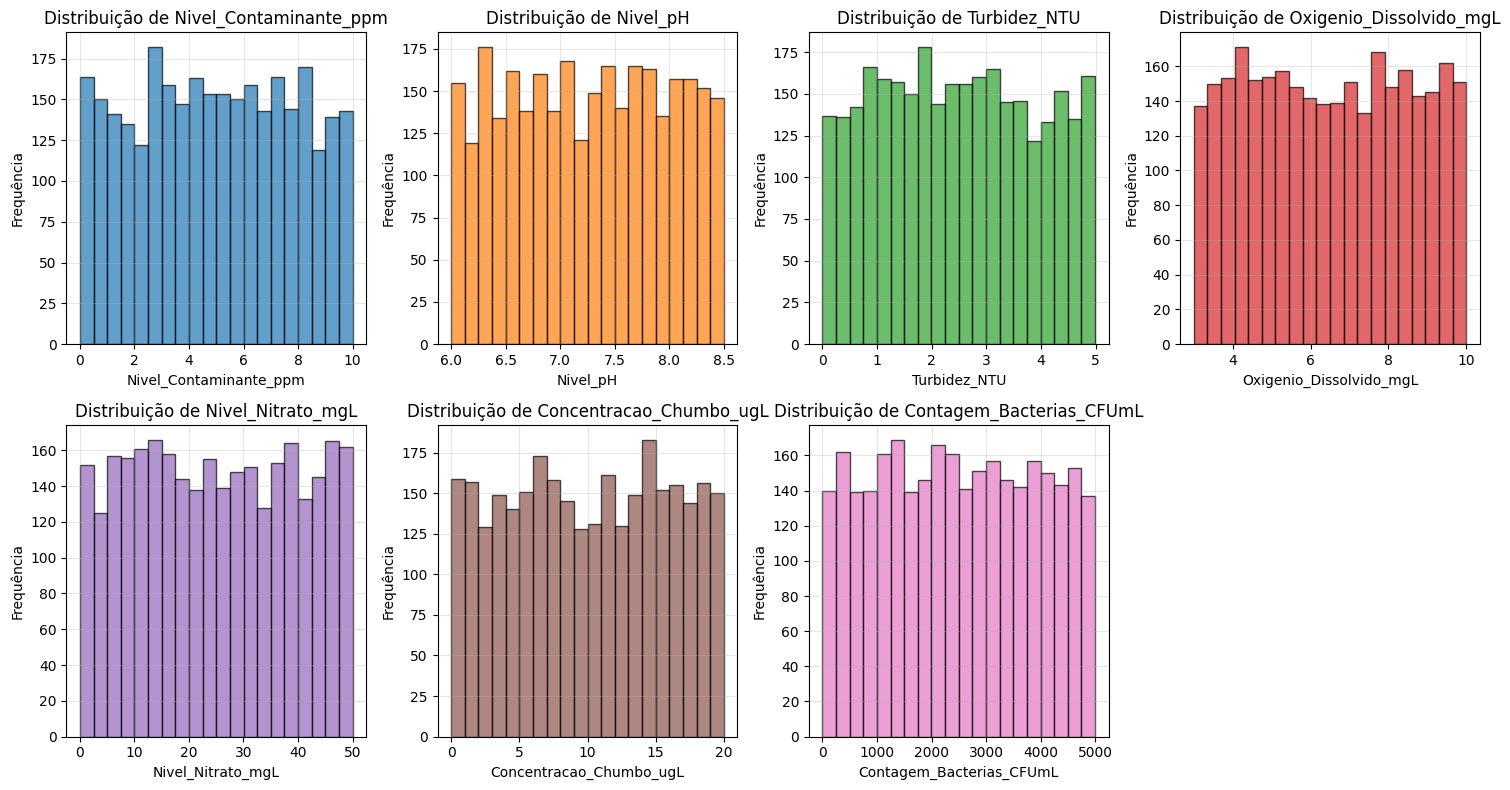

📊 ESTATÍSTICAS DOS POLUENTES:
• Nivel_Contaminante_ppm:
   Média: 4.95
   Máximo: 10.00
• Nivel_pH:
   Média: 7.26
   Máximo: 8.50
• Turbidez_NTU:
   Média: 2.48
   Máximo: 4.99
• Oxigenio_Dissolvido_mgL:
   Média: 6.49
   Máximo: 10.00
• Nivel_Nitrato_mgL:
   Média: 25.08
   Máximo: 49.99
• Concentracao_Chumbo_ugL:
   Média: 10.05
   Máximo: 20.00
• Contagem_Bacterias_CFUmL:
   Média: 2488.48
   Máximo: 4998.00


In [57]:
# PERGUNTA 1: Como estão distribuídos os diferentes tipos de poluentes?

# Cria uma área com vários gráficos (2 linhas e 4 colunas)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()  # Deixa os eixos em uma lista simples para facilitar o uso

# Para cada poluente, faz um gráfico de distribuição (histograma)
for i, poluente in enumerate(poluentes):
    # Cria o gráfico mostrando como os valores do poluente estão distribuídos
    axes[i].hist(df[poluente], bins=20, color=f'C{i}', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribuição de {poluente}')
    axes[i].set_xlabel(poluente)
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

# Esconde os gráficos vazios (caso tenha menos de 8 poluentes)
for i in range(len(poluentes), 8):
    axes[i].set_visible(False)

# ajusta os espaços entre os gráficos e mostra tudo
plt.tight_layout()
plt.show()

# Apenas um print para ficar mais claro
##Mostra as estatísticas básicas de cada poluente
print("📊 ESTATÍSTICAS DOS POLUENTES:")
for poluente in poluentes:
    media = df[poluente].mean()
    maximo = df[poluente].max()
    print(f"• {poluente}:")
    print(f"   Média: {media:.2f}")
    print(f"   Máximo: {maximo:.2f}")


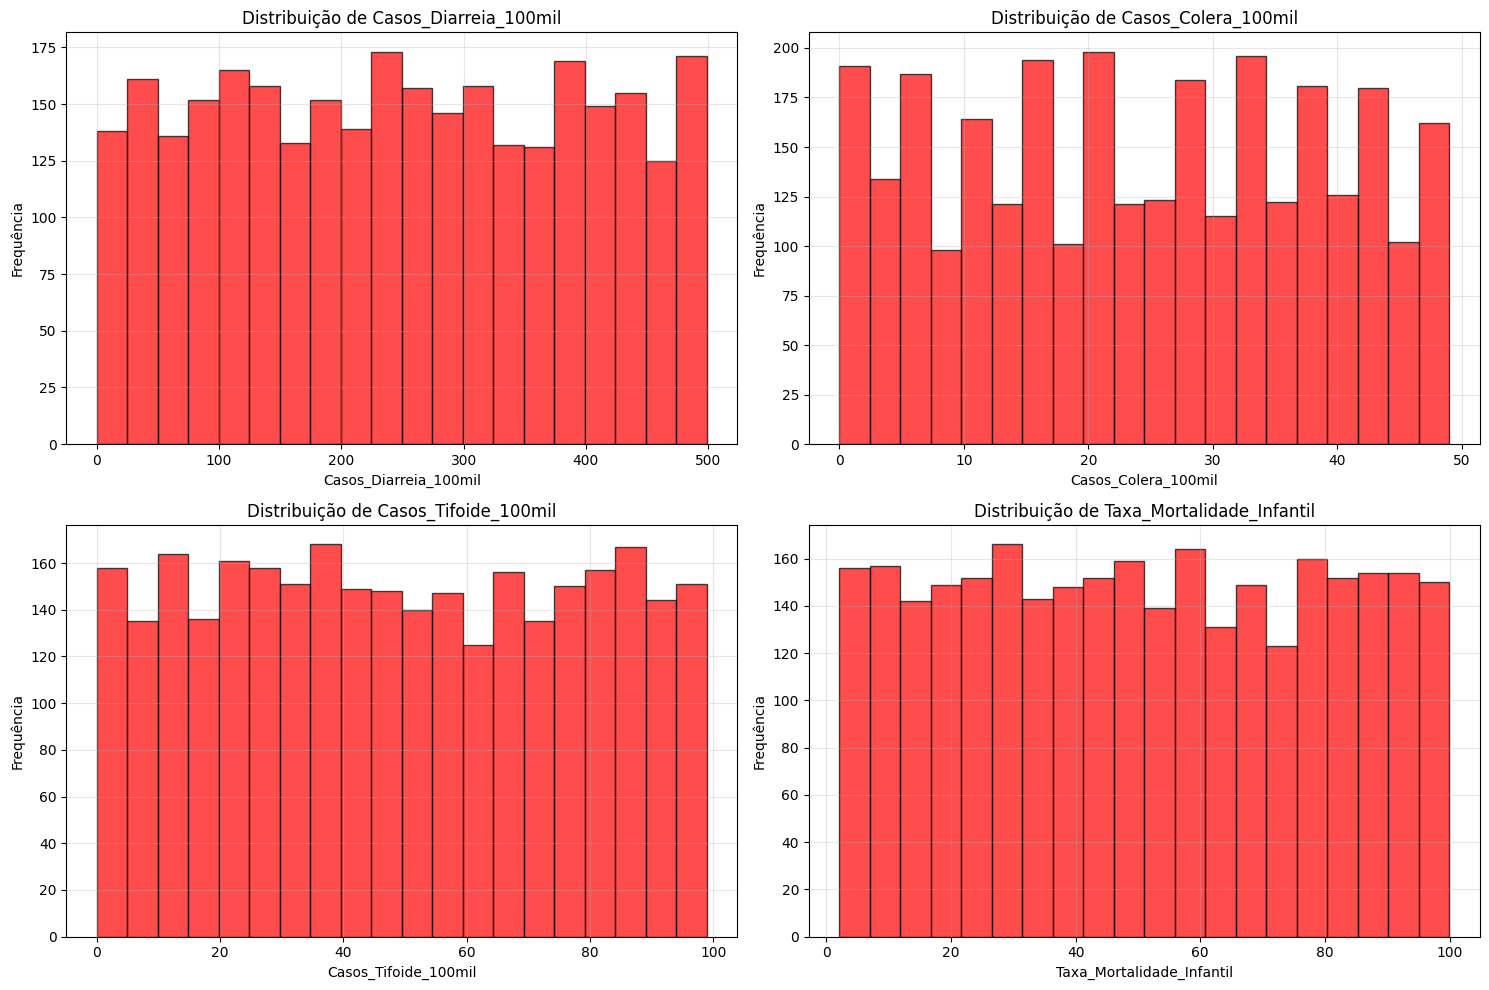

🏥 ESTATÍSTICAS DAS DOENÇAS:
• Casos_Diarreia_100mil:
  Média: 250
  Máximo: 499
• Casos_Colera_100mil:
  Média: 24
  Máximo: 49
• Casos_Tifoide_100mil:
  Média: 49
  Máximo: 99
• Taxa_Mortalidade_Infantil:
  Média: 51
  Máximo: 100


In [32]:
# PERGUNTA 2: Como estão distribuídos os diferentes tipos de doenças?

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
# Para cada tipo de doença, faz um gráfico de distribuição (histograma)
for i, doenca in enumerate(doencas):
    # Cria o gráfico mostrando como os casos dessa doença estão distribuídos
    axes[i].hist(df[doenca], bins=20, color='red', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribuição de {doenca}')
    axes[i].set_xlabel(doenca)
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostra as estatísticas básicas das doenças
print("🏥 ESTATÍSTICAS DAS DOENÇAS:")
for doenca in doencas:
    media = df[doenca].mean()
    maximo = df[doenca].max()
    print(f"• {doenca}:")
    print(f"   Média: {media:.0f}")
    print(f"   Máximo: {maximo:.0f}")


### PERGUNTAS COMPARATIVAS

**Variáveis** **usadas**: poluentes_principais, doencas, Regiao

**Bibliotecas**: matplotlib.pyplot, pandas

**Perguntas** **feitas**:

1. Qual região tem a pior qualidade de água em diferentes aspectos?

2. Como as diferentes doenças se distribuem pelas regiões?




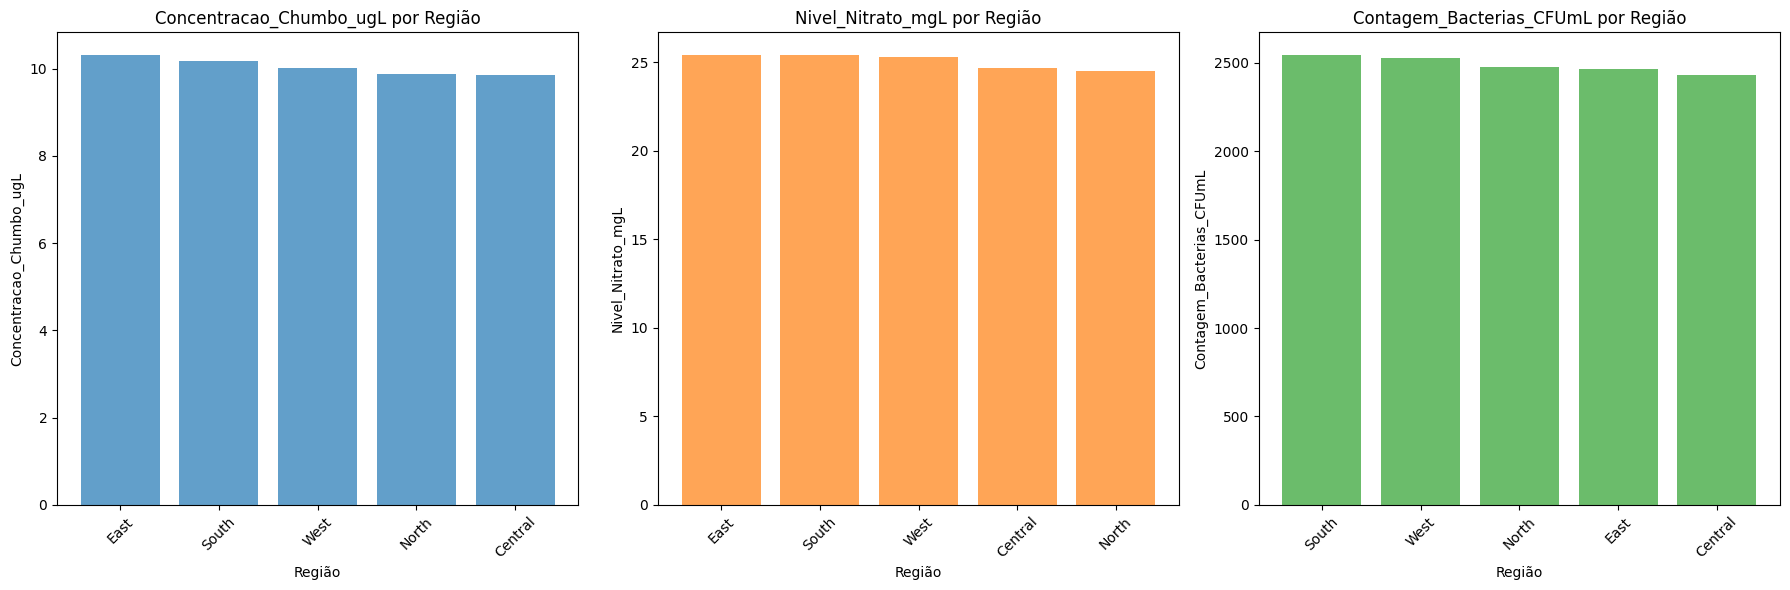

🏆 REGIÕES COM MAIOR POLUIÇÃO:
• Concentracao_Chumbo_ugL: East (10.32)
• Nivel_Nitrato_mgL: East (25.43)
• Contagem_Bacterias_CFUmL: South (2544.56)


In [34]:
# PERGUNTA 3: Qual região tem a pior qualidade de água em diferentes aspectos?

# Define os poluentes principais que queremos comparar entre as regiões
poluentes_principais = ['Concentracao_Chumbo_ugL', 'Nivel_Nitrato_mgL', 'Contagem_Bacterias_CFUmL']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Para cada tipo de poluente, cria um gráfico de barras comparando as regiões
for i, poluente in enumerate(poluentes_principais):
    # Calcula a média do poluente em cada região
    media_por_regiao = df.groupby('Regiao')[poluente].mean().sort_values(ascending=False)

    # Cria o gráfico de barras
    axes[i].bar(media_por_regiao.index, media_por_regiao.values, color=f'C{i}', alpha=0.7)

    axes[i].set_title(f'{poluente} por Região')
    axes[i].set_xlabel('Região')
    axes[i].set_ylabel(poluente)
    axes[i].tick_params(axis='x', rotation=45)  # Gira os nomes das regiões pra não ficarem tortos

plt.tight_layout()
plt.show()

# Mostra no terminal qual região tem a pior qualidade da água (maior poluição)
print("🏆 REGIÕES COM MAIOR POLUIÇÃO:")
for poluente in poluentes_principais:
    regiao_mais_poluida = df.groupby('Regiao')[poluente].mean().idxmax()  # Região com o valor mais alto
    valor_maximo = df.groupby('Regiao')[poluente].mean().max()  # Valor máximo
    print(f"• {poluente}: {regiao_mais_poluida} ({valor_maximo:.2f})")


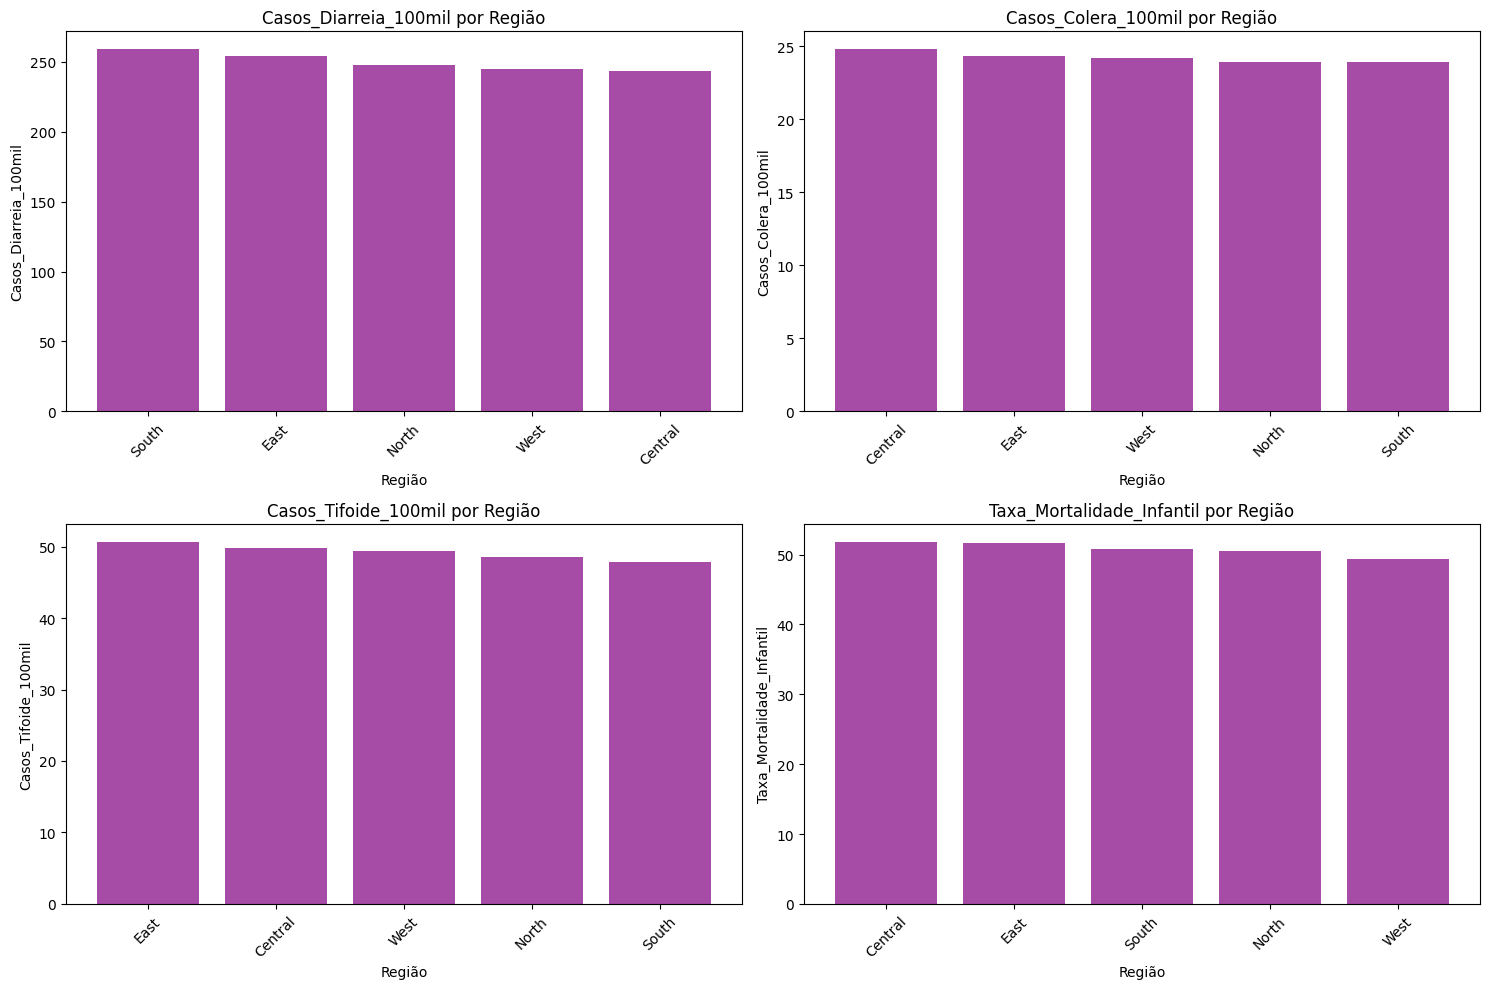

🏥 REGIÕES COM MAIS DOENÇAS:
• Casos_Diarreia_100mil: South (259)
• Casos_Colera_100mil: Central (25)
• Casos_Tifoide_100mil: East (51)
• Taxa_Mortalidade_Infantil: Central (52)


In [35]:
# PERGUNTA 4: Como as diferentes doenças se distribuem pelas regiões?

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.ravel()  # Deixa os eixos em formato de lista para facilitar o uso

# Para cada tipo de doença, cria um gráfico mostrando como ela aparece nas regiões
for i, doenca in enumerate(doencas):
    media_por_regiao = df.groupby('Regiao')[doenca].mean().sort_values(ascending=False)

    # Cria o gráfico de barras para mostrar as diferenças entre as regiões
    axes[i].bar(media_por_regiao.index, media_por_regiao.values, color='purple', alpha=0.7)

    axes[i].set_title(f'{doenca} por Região')
    axes[i].set_xlabel('Região')
    axes[i].set_ylabel(doenca)
    axes[i].tick_params(axis='x', rotation=45)  # Gira o nome das regiões para facilitar a leitura

plt.tight_layout()
plt.show()

# Mostra no terminal as regiões com mais casos de cada doença
print("🏥 REGIÕES COM MAIS DOENÇAS:")
for doenca in doencas:
    regiao_mais_doente = df.groupby('Regiao')[doenca].mean().idxmax()  # Região com maior média
    valor_maximo = df.groupby('Regiao')[doenca].mean().max()  # Valor máximo
    print(f"• {doenca}: {regiao_mais_doente} ({valor_maximo:.0f})")


### PERGUNTAS DE RELAÇÃO

**Variáveis** **usadas**: poluentes, doencas, Contagem_Bacterias_CFUmL, Casos_Diarreia_100mil

**Bibliotecas**: matplotlib.pyplot, numpy, pandas

**Perguntas** **feitas**:

1. Qual poluente tem maior correlação com doenças diarreicas?

2. A contagem de bactérias afeta diferentes tipos de doenças?




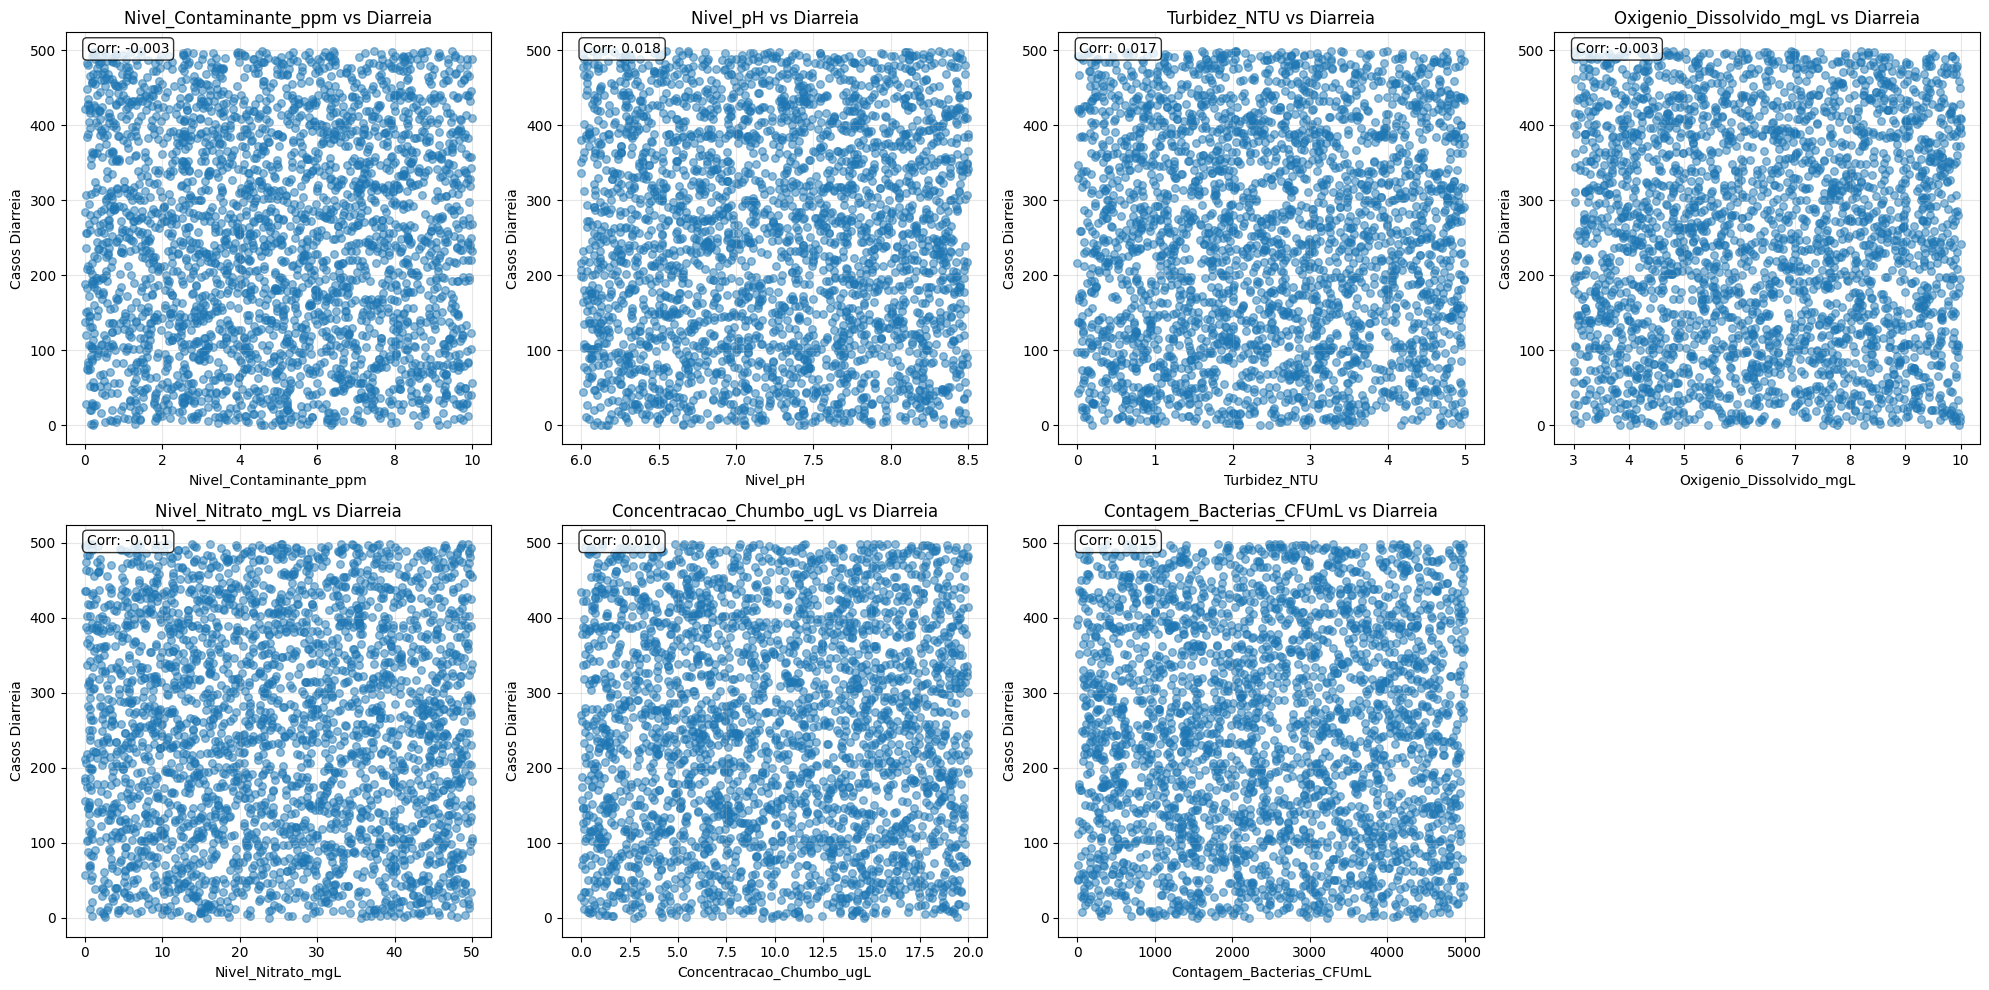

🔗 CORRELAÇÃO POLUENTES-DIARREIA (ordenado):
• Nivel_pH: 0.018
• Turbidez_NTU: 0.017
• Contagem_Bacterias_CFUmL: 0.015
• Nivel_Nitrato_mgL: 0.011
• Concentracao_Chumbo_ugL: 0.010
• Oxigenio_Dissolvido_mgL: 0.003
• Nivel_Contaminante_ppm: 0.003


In [36]:
# PERGUNTA 5: Qual poluente tem maior correlação com doenças diarreicas?

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

for i, poluente in enumerate(poluentes):
    # Cria o gráfico de dispersão (cada ponto representa uma observação)
    axes[i].scatter(df[poluente], df['Casos_Diarreia_100mil'], alpha=0.5, s=30)
    axes[i].set_title(f'{poluente} vs Diarreia')
    axes[i].set_xlabel(poluente)
    axes[i].set_ylabel('Casos de Diarreia')
    axes[i].grid(True, alpha=0.3)

    # Calcula a correlação entre o poluente e os casos de diarreia
    corr = df[poluente].corr(df['Casos_Diarreia_100mil'])
    # Mostra o valor da correlação dentro do gráfico
    axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', transform=axes[i].transAxes,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Esconde os gráficos se tiver menos de 8 poluentes
for i in range(len(poluentes), 8):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Mostra as correlações de todos os poluentes com a diarreia, em ordem decrescente
print("🔗 CORRELAÇÃO ENTRE POLUENTES E DIARREIA (do mais forte ao mais fraco):")
correlacoes = {}

# Calcula a correlação de cada poluente com a diarreia
for poluente in poluentes:
    corr = abs(df[poluente].corr(df['Casos_Diarreia_100mil']))
    correlacoes[poluente] = corr

# Ordena do maior para o menor
for poluente, corr in sorted(correlacoes.items(), key=lambda x: x[1], reverse=True):
    print(f"• {poluente}: {corr:.3f}")


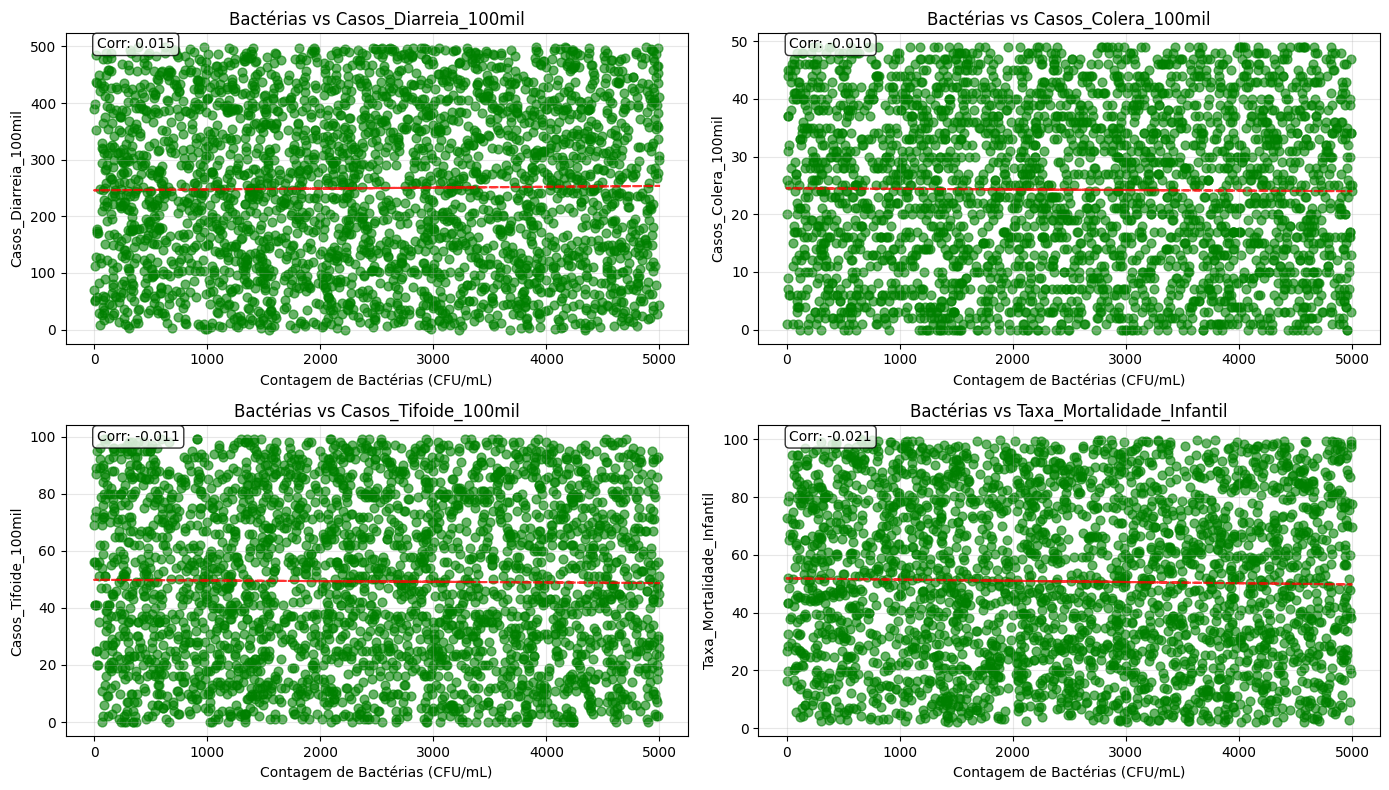

🦠 CORRELAÇÃO ENTRE CONTAGEM DE BACTÉRIAS E DOENÇAS (do mais forte ao mais fraco):
• Nivel_pH: 0.018
• Turbidez_NTU: 0.017
• Contagem_Bacterias_CFUmL: 0.015
• Nivel_Nitrato_mgL: 0.011
• Concentracao_Chumbo_ugL: 0.010
• Oxigenio_Dissolvido_mgL: 0.003
• Nivel_Contaminante_ppm: 0.003


In [61]:
# PERGUNTA 6: A contagem de bactérias afeta diferentes tipos de doenças?

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.ravel()  # Deixa os eixos em formato de lista para facilitar o uso

# Para cada tipo de doença, faz um gráfico comparando com o nível de bactérias
for i, doenca in enumerate(doencas):
    # Cria o gráfico de dispersão (cada ponto representa uma observação)
    axes[i].scatter(df['Contagem_Bacterias_CFUmL'], df[doenca], alpha=0.6, color='green', s=40)

    axes[i].set_title(f'Bactérias vs {doenca}')
    axes[i].set_xlabel('Contagem de Bactérias (CFU/mL)')
    axes[i].set_ylabel(doenca)
    axes[i].grid(True, alpha=0.3)

    # uma linha de tendência (mostra a direção da relação)
    z = np.polyfit(df['Contagem_Bacterias_CFUmL'], df[doenca], 1)  # Calcula a linha
    p = np.poly1d(z)
    axes[i].plot(df['Contagem_Bacterias_CFUmL'], p(df['Contagem_Bacterias_CFUmL']), "r--", alpha=0.8)

    #  a correlação entre bactérias e a doença
    corr = df['Contagem_Bacterias_CFUmL'].corr(df[doenca])
    # Mostra o valor da correlação dentro do gráfico
    axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', transform=axes[i].transAxes,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))



# Ajusta o espaço entre os gráficos e mostra tudo
plt.tight_layout()
plt.show()

print("🦠 CORRELAÇÃO ENTRE CONTAGEM DE BACTÉRIAS E DOENÇAS (do mais forte ao mais fraco):")
for doenca, corr in sorted(correlacoes.items(), key=lambda x: x[1], reverse=True):
    print(f"• {doenca}: {corr:.3f}")

### PERGUNTAS TEMPORAIS

**Variáveis** **usadas**: Ano, poluentes, doencas, Temperatura_C, Precipitacao_mm_ano

**Bibliotecas**: matplotlib.pyplot, numpy, scipy.stats, pandas

**Perguntas** **feitas**:

1. A qualidade da água melhorou ou piorou ao longo dos anos?

2. Os casos de doenças estão seguindo a mesma tendência da poluição?

3. Como fatores ambientais como temperatura e chuva evoluíram?




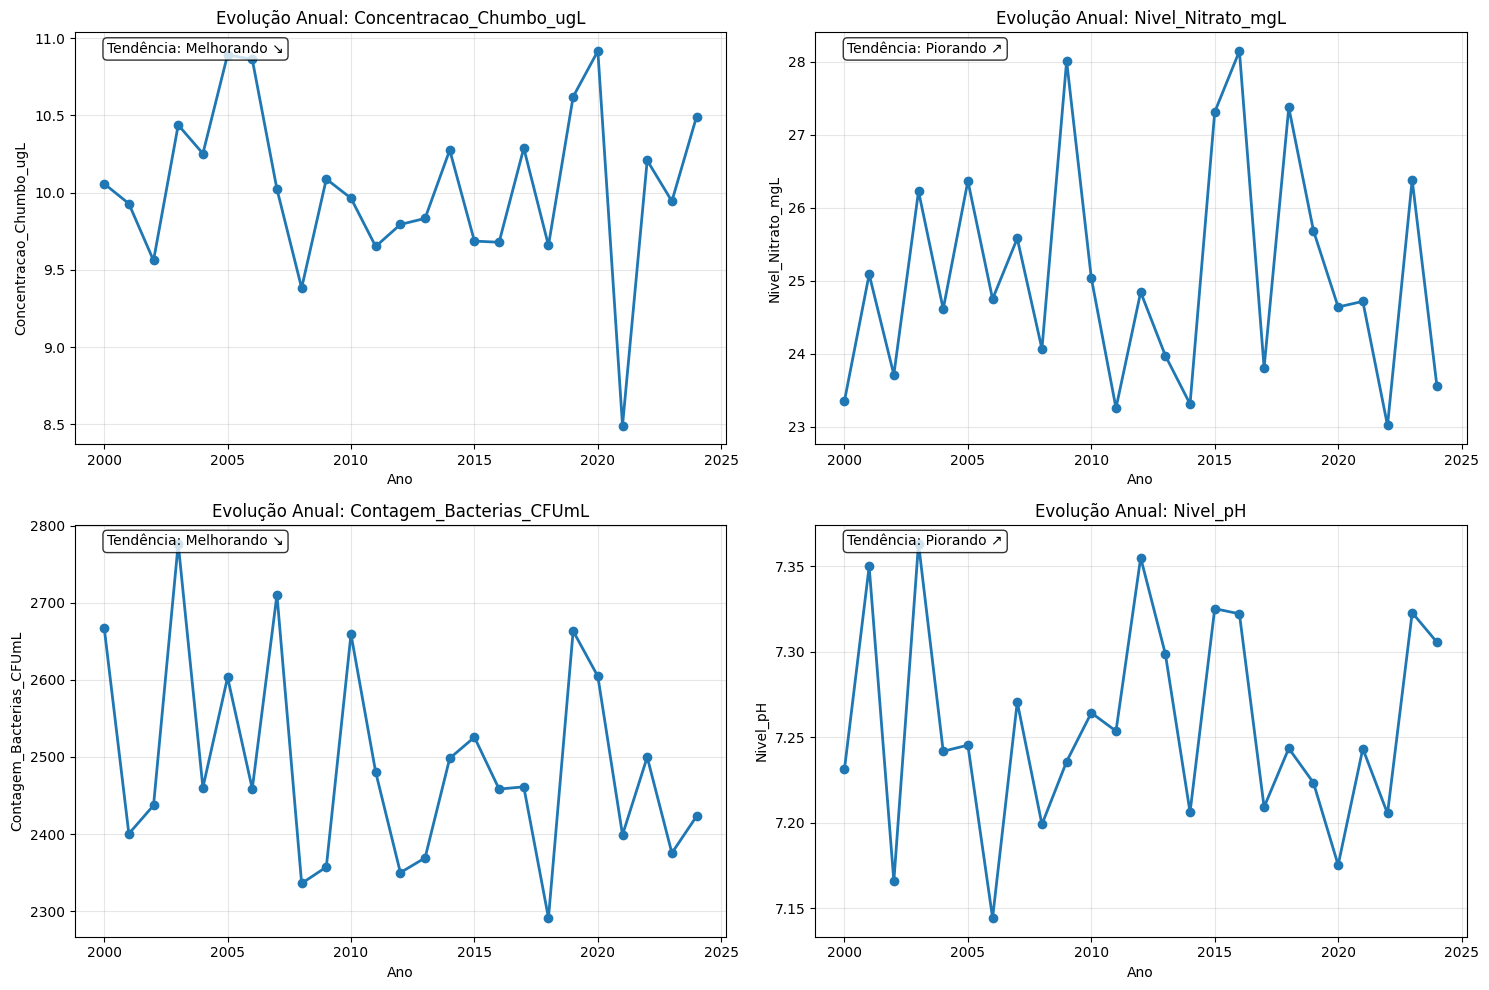

📈 TENDÊNCIA ANUAL DOS INDICADORES DE QUALIDADE DA ÁGUA:
• Concentracao_Chumbo_ugL: Melhorando ↘️
• Nivel_Nitrato_mgL: Piorando ↗️
• Contagem_Bacterias_CFUmL: Melhorando ↘️
• Nivel_pH: Piorando ↗️


In [62]:
# PERGUNTA TEMPORAL 7: "A qualidade da água melhorou ou piorou ao longo dos anos?"

# Indicadores de qualidade da água que vamos analisar
indicadores_qualidade = [ 'Concentracao_Chumbo_ugL', 'Nivel_Nitrato_mgL', 'Contagem_Bacterias_CFUmL', 'Nivel_pH'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

tendencias = {}  # Vai guardar se cada indicador está melhorando ou piorando

# Loop para cada indicador
for i, indicador in enumerate(indicadores_qualidade):
    #  a média anual do indicador
    evolucao_anual = df.groupby('Ano')[indicador].mean()

    #  gráfico de linha mostrando a evolução ao longo dos anos
    axes[i].plot(evolucao_anual.index, evolucao_anual.values, marker='o', linewidth=2)
    axes[i].set_title(f'Evolução Anual: {indicador}')
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel(indicador)
    axes[i].grid(True, alpha=0.3)

    # Calcula a tendência (linha de regressão simples)
    slope, intercept = np.polyfit(evolucao_anual.index, evolucao_anual.values, 1)
    tendencia = "Melhorando ↘️" if slope < 0 else "Piorando ↗️"
    tendencias[indicador] = tendencia  # detalhe que Guarda a tendência para mostrar no console

    # Mostra a tendência dentro do gráfico
    axes[i].text(0.05, 0.95, f'Tendência: {tendencia}', transform=axes[i].transAxes,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Mostra no console a tendência de cada indicador
print("📈 TENDÊNCIA ANUAL DOS INDICADORES DE QUALIDADE DA ÁGUA:")
for indicador, tendencia in tendencias.items():
    print(f"• {indicador}: {tendencia}")


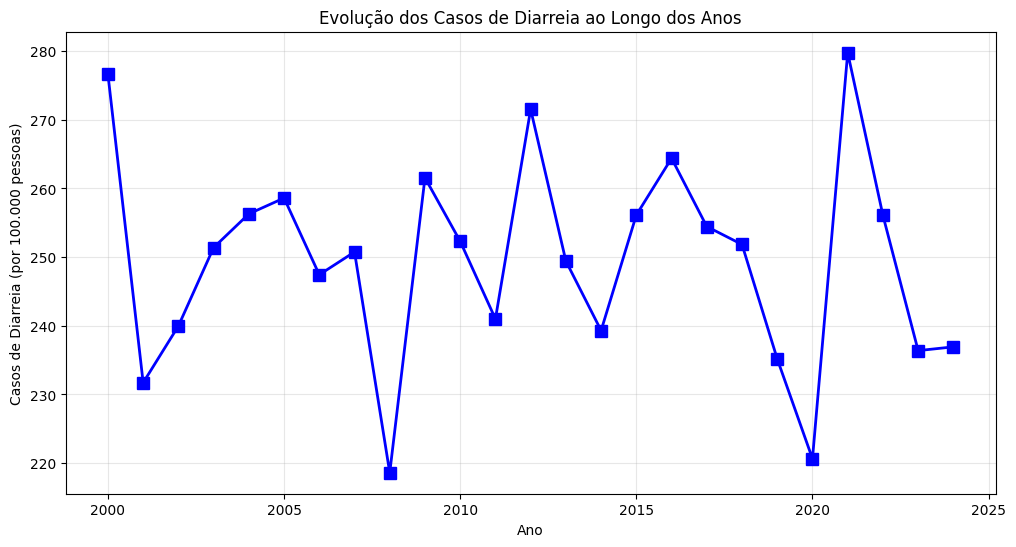

📈 TENDÊNCIA ANUAL DOS CASOS DE DIARREIA:
• Tendência: DIMINUINDO ↘️
• Variação anual média: -0.2 casos por ano


In [63]:
# PERGUNTA TEMPORAL 8: "Os casos de doenças estão seguindo a mesma tendência da poluição?"

from scipy import stats  # Para calcular a linha de tendência simples

# Calcula a média anual de casos de diarreia
doencas_anual = df.groupby('Ano')['Casos_Diarreia_100mil'].mean()

plt.figure(figsize=(12, 6))
plt.plot(doencas_anual.index, doencas_anual.values,
         marker='s', linewidth=2, color='blue', markersize=8)
plt.title('Evolução dos Casos de Diarreia ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Casos de Diarreia (por 100.000 pessoas)')
plt.grid(True, alpha=0.3)
plt.show()

# Calcula a tendência com regressão linear
slope, _, _, _, _ = stats.linregress(doencas_anual.index, doencas_anual.values)
tendencia = "AUMENTANDO ↗️" if slope > 0 else "DIMINUINDO ↘️"

# Mostra no console a tendência e a variação anual
print("📈 TENDÊNCIA ANUAL DOS CASOS DE DIARREIA:")
print(f"• Tendência: {tendencia}")
print(f"• Variação anual média: {slope:.1f} casos por ano")


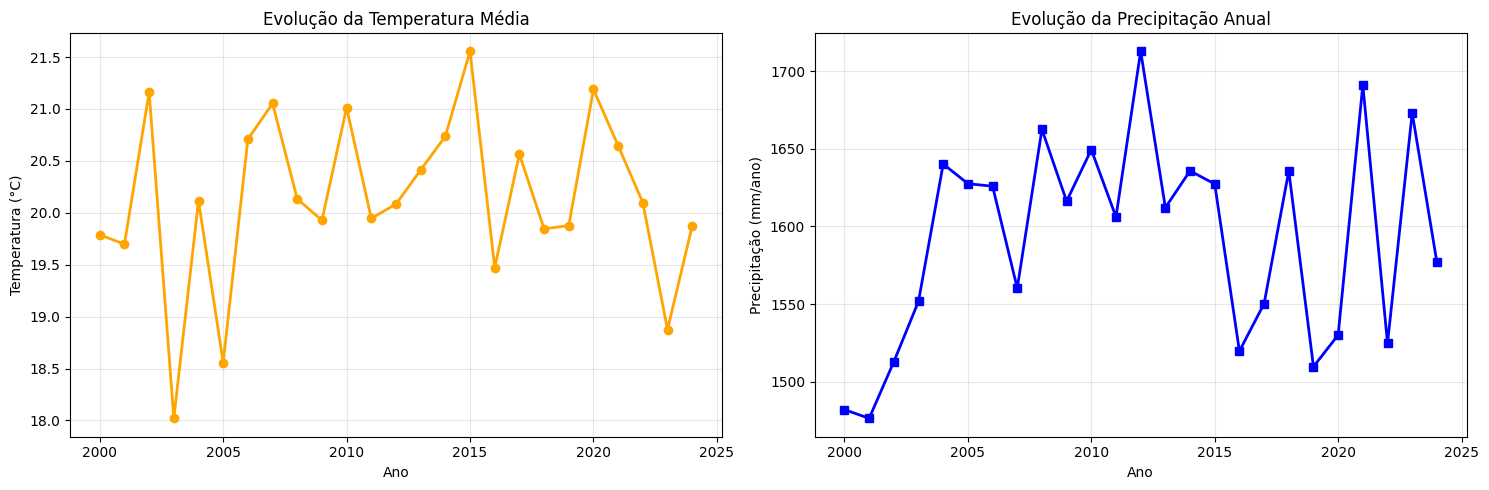

🌡️ TENDÊNCIAS AMBIENTAIS:
• Temperatura: AUMENTANDO ↗️ (0.013 °C/ano)
• Precipitação: AUMENTANDO ↗️ (1.9 mm/ano)


In [65]:
# PERGUNTA TEMPORAL 3: "Como fatores ambientais como temperatura e chuva evoluíram?"

from scipy import stats  # Para calcular tendência

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ----- Temperatura -----
temp_anual = df.groupby('Ano')['Temperatura_C'].mean()  # Média anual
axes[0].plot(temp_anual.index, temp_anual.values, marker='o', linewidth=2, color='orange')
axes[0].set_title('Evolução da Temperatura Média')
axes[0].set_xlabel('Ano')
axes[0].set_ylabel('Temperatura (°C)')
axes[0].grid(True, alpha=0.3)

# ----- Precipitação -----
chuva_anual = df.groupby('Ano')['Precipitacao_mm_ano'].mean()  # Média anual
axes[1].plot(chuva_anual.index, chuva_anual.values, marker='s', linewidth=2, color='blue')
axes[1].set_title('Evolução da Precipitação Anual')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Precipitação (mm/ano)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🌡️ TENDÊNCIAS AMBIENTAIS:")

# Temperatura
if len(temp_anual) > 1:
    slope_temp, _, _, _, _ = stats.linregress(temp_anual.index, temp_anual.values)
    tendencia_temp = "AUMENTANDO ↗️" if slope_temp > 0 else "DIMINUINDO ↘️"
    print(f"• Temperatura: {tendencia_temp} ({slope_temp:.3f} °C/ano)")

# Precipitação
if len(chuva_anual) > 1:
    slope_chuva, _, _, _, _ = stats.linregress(chuva_anual.index, chuva_anual.values)
    tendencia_chuva = "AUMENTANDO ↗️" if slope_chuva > 0 else "DIMINUINDO ↘️"
    print(f"• Precipitação: {tendencia_chuva} ({slope_chuva:.1f} mm/ano)")


### PERGUNTAS PREDITIVAS - BONUS

**Variáveis** **usadas**: poluentes, fatores_saude, PIB_Per_Capita_USD, Cobertura_Saneamento_Percentual, Taxa_Mortalidade_Infantil

**Bibliotecas**: matplotlib.pyplot, numpy, pandas

**Perguntas** **feitas**:

1. Quais fatores têm maior impacto na saúde infantil?


2. Como todas as variáveis se relacionam entre si?

*   Mapa de calor de correlação (sns.heatmap)





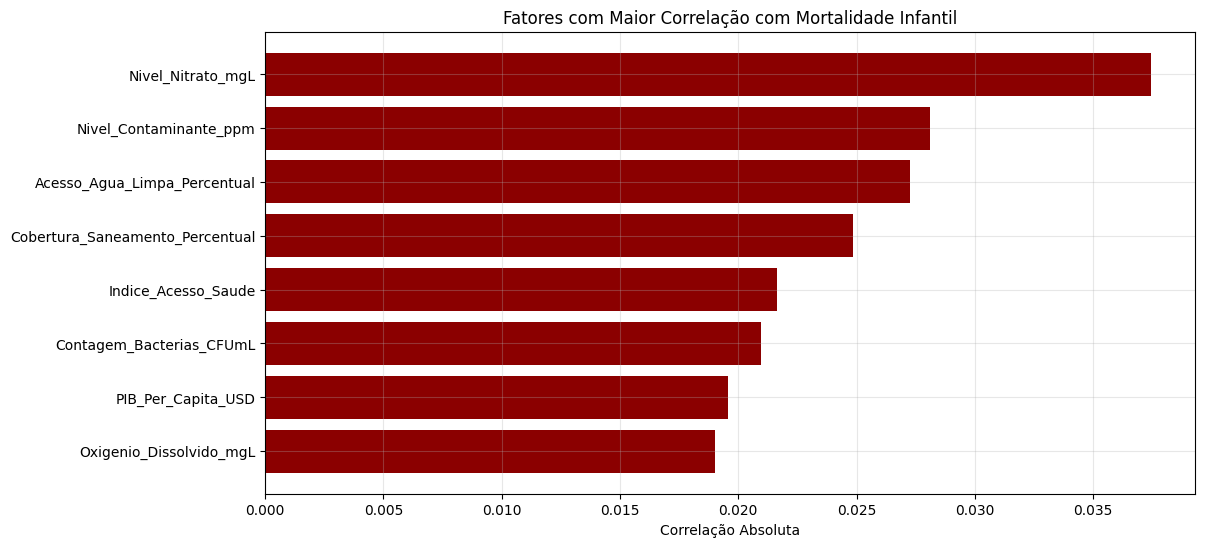

🎯 FATORES QUE MAIS IMPACTAM MORTALIDADE INFANTIL:
• Nivel_Nitrato_mgL: 0.037
• Nivel_Contaminante_ppm: 0.028
• Acesso_Agua_Limpa_Percentual: 0.027
• Cobertura_Saneamento_Percentual: 0.025
• Indice_Acesso_Saude: 0.022
• Contagem_Bacterias_CFUmL: 0.021
• PIB_Per_Capita_USD: 0.020
• Oxigenio_Dissolvido_mgL: 0.019


In [68]:
# PERGUNTA PREDITIVA 1: "Quais fatores têm maior impacto na saúde infantil?"


# Lista de fatores que podem influenciar a saúde infantil
fatores = poluentes + fatores_saude + ['PIB_Per_Capita_USD', 'Cobertura_Saneamento_Percentual']

# Calcula a correlação absoluta de cada fator com a mortalidade infantil
correlacoes_mortalidade = {}
for fator in fatores:
    if fator in df.columns:  # Só considera colunas que existem
        corr = abs(df[fator].corr(df['Taxa_Mortalidade_Infantil']))
        correlacoes_mortalidade[fator] = corr

# Seleciona os 8 fatores com maior correlação
top_fatores = dict(sorted(correlacoes_mortalidade.items(), key=lambda x: x[1], reverse=True)[:8])

# Gráfico de barras horizontais
plt.figure(figsize=(12, 6))
plt.barh(list(top_fatores.keys()), list(top_fatores.values()), color='darkred')
plt.title('Fatores com Maior Correlação com Mortalidade Infantil')
plt.xlabel('Correlação Absoluta')
plt.gca().invert_yaxis()  # Coloca o fator mais forte no topo
plt.grid(True, alpha=0.3)
plt.show()

# Print resumido para a oficina
print("🎯 FATORES QUE MAIS IMPACTAM MORTALIDADE INFANTIL:")
for fator, corr in top_fatores.items():
    print(f"• {fator}: {corr:.3f}")


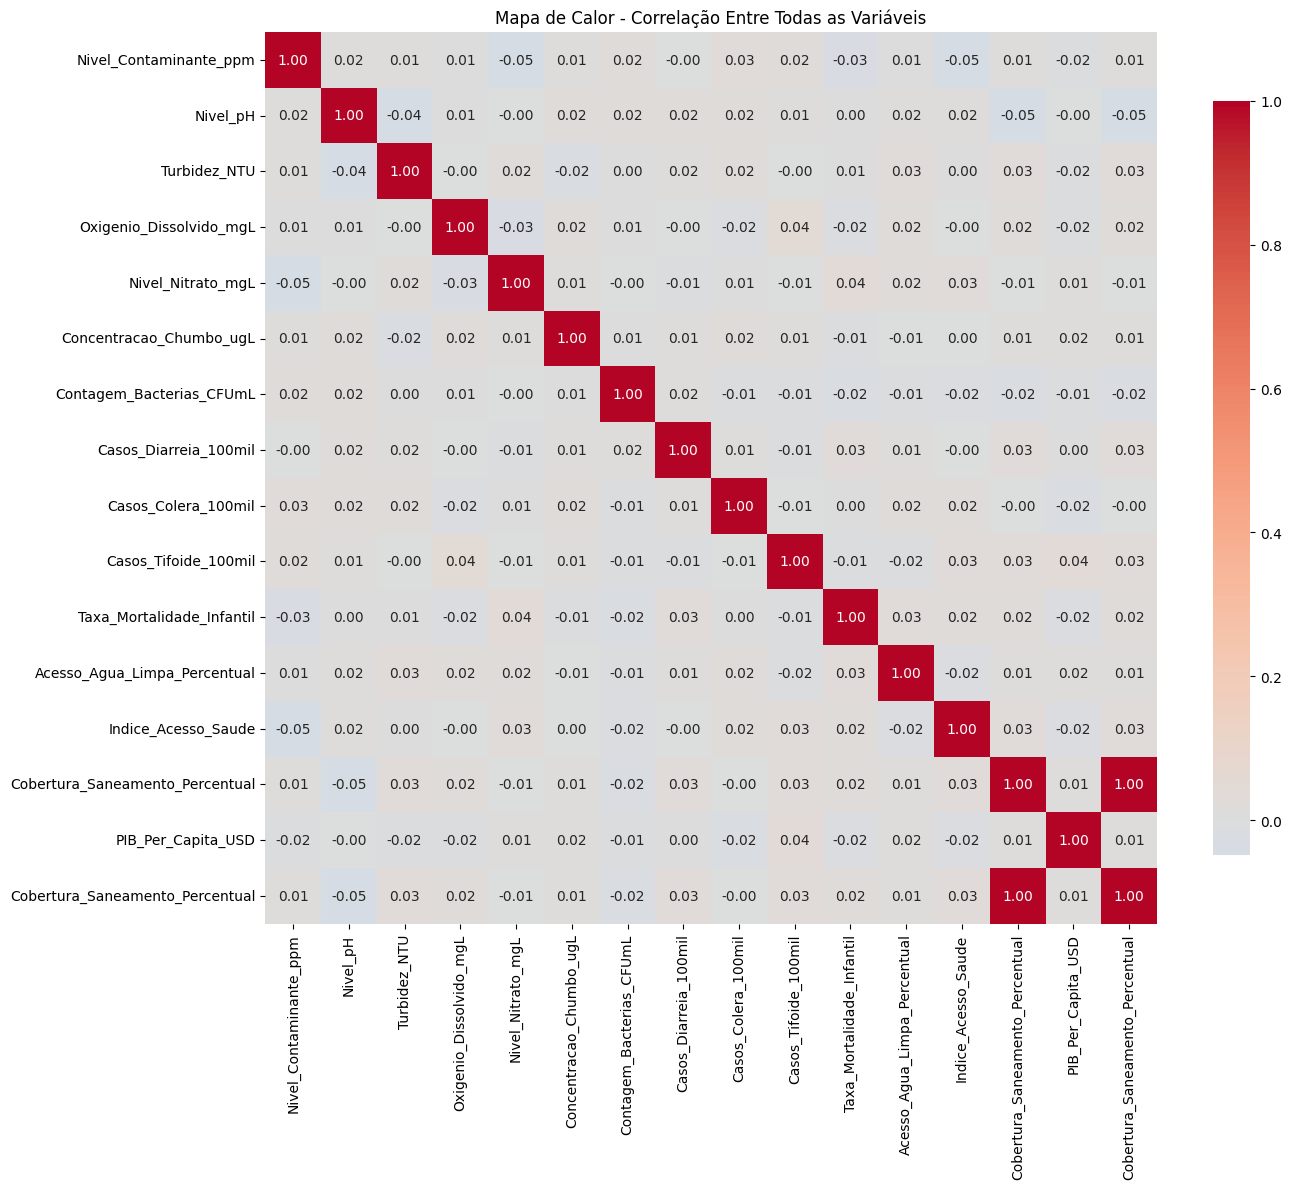

In [69]:
# PERGUNTA PREDITIVA 2: "Como todas as variáveis se relacionam entre si?"


# Lista completa de variáveis a analisar
variaveis_completas = poluentes + doencas + fatores_saude + ['PIB_Per_Capita_USD', 'Cobertura_Saneamento_Percentual']

# Seleciona apenas as colunas que existem no dataframe
variaveis_selecionadas = [v for v in variaveis_completas if v in df.columns]

# Calcula a matriz de correlação
corr_matrix = df[variaveis_selecionadas].corr()

# Plota o mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor - Correlação Entre Todas as Variáveis')
plt.tight_layout()
plt.show()


## ETAPA 5: CONCLUSÕES


In [41]:
print("=== 🎯 CONCLUSÕES COMPLETAS DA ANÁLISE ===")

# Principais descobertas
print("📊 DESCOBERTAS PRINCIPAIS:")

# 1. Poluente mais problemático
correlacoes_diarreia = {}
for poluente in poluentes:
    corr = abs(df[poluente].corr(df['Casos_Diarreia_100mil']))
    correlacoes_diarreia[poluente] = corr

poluente_mais_correlacionado = max(correlacoes_diarreia, key=correlacoes_diarreia.get)
print(f"1. Poluente com maior correlação com diarreia: {poluente_mais_correlacionado}")

# 2. Região mais crítica
regiao_mais_doente = df.groupby('Regiao')['Casos_Diarreia_100mil'].mean().idxmax()
print(f"2. Região com mais doenças: {regiao_mais_doente}")

# 3. Fator mais importante para saúde infantil
fator_mais_importante = max(correlacoes_mortalidade, key=correlacoes_mortalidade.get)
print(f"3. Fator mais importante para mortalidade infantil: {fator_mais_importante}")

print(f"\n💡 RECOMENDAÇÕES ESTRATÉGICAS:")
print("1. 🎯 Focar no controle de " + poluente_mais_correlacionado.split('_')[-1])
print("2. 🏥 Priorizar ações de saúde em " + regiao_mais_doente)
print("3. 💧 Melhorar " + fator_mais_importante.replace('_', ' ').lower())
print("4. 🔬 Monitorar múltiplos poluentes simultaneamente")
print("5. 🌍 Desenvolver estratégias regionais específicas")

print(f"\n✅ ANÁLISE COMPLETA CONCLUÍDA!")

=== 🎯 CONCLUSÕES COMPLETAS DA ANÁLISE ===
📊 DESCOBERTAS PRINCIPAIS:
1. Poluente com maior correlação com diarreia: Nivel_pH
2. Região com mais doenças: South
3. Fator mais importante para mortalidade infantil: Nivel_Nitrato_mgL

💡 RECOMENDAÇÕES ESTRATÉGICAS:
1. 🎯 Focar no controle de pH
2. 🏥 Priorizar ações de saúde em South
3. 💧 Melhorar nivel nitrato mgl
4. 🔬 Monitorar múltiplos poluentes simultaneamente
5. 🌍 Desenvolver estratégias regionais específicas

✅ ANÁLISE COMPLETA CONCLUÍDA!
